In [3]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix


In [13]:

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Use only 3 classes: 0=airplane, 1=automobile, 2=bird
selected_classes = [0, 1, 2]
train_filter = np.isin(y_train, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Normalize and flatten images
x_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
def one_hot(y):
    n_classes = len(selected_classes)
    y_encoded = np.zeros((y.shape[0], n_classes))
    for i in range(y.shape[0]):
        y_encoded[i, selected_classes.index(y[i][0])] = 1
    return y_encoded

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [104]:
input_size = x_train.shape[1]      # Flattened image size (e.g. 32*32*3 = 3072)
hidden1_size = 512
hidden2_size = 256
output_size = 3
learning_rate = 0.01

# Weight initialization
W1 = np.random.randn(input_size, hidden1_size) * 0.01
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size) * 0.01
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size) * 0.01
b3 = np.zeros((1, output_size))


In [106]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))


In [114]:
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = x_train @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)

    Z3 = A2 @ W3 + b3
    y_pred_train = softmax(Z3)
    
    #loss 
    loss = cross_entropy_loss(y_pred_train, y_train_oh)
    losses.append(loss)
    
    # Backward pass
    # Loss gradient
    dZ3 = y_pred_train - y_train_oh
    dW3 = A2.T @ dZ3 / x_train.shape[0]
    db3 = np.sum(dZ3, axis=0, keepdims=True) / x_train.shape[0]

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = A1.T @ dZ2 /  x_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) /  x_train.shape[0]

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = x_train.T @ dZ1 / x_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) /  x_train.shape[0]
    
   # Update weights 
    
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


    

Epoch 1, Loss: 1.0975
Epoch 2, Loss: 1.0974
Epoch 3, Loss: 1.0974
Epoch 4, Loss: 1.0974
Epoch 5, Loss: 1.0974
Epoch 6, Loss: 1.0973
Epoch 7, Loss: 1.0973
Epoch 8, Loss: 1.0973
Epoch 9, Loss: 1.0973
Epoch 10, Loss: 1.0973
Epoch 11, Loss: 1.0972
Epoch 12, Loss: 1.0972
Epoch 13, Loss: 1.0972
Epoch 14, Loss: 1.0972
Epoch 15, Loss: 1.0971
Epoch 16, Loss: 1.0971
Epoch 17, Loss: 1.0971
Epoch 18, Loss: 1.0971
Epoch 19, Loss: 1.0970
Epoch 20, Loss: 1.0970
Epoch 21, Loss: 1.0970
Epoch 22, Loss: 1.0970
Epoch 23, Loss: 1.0970
Epoch 24, Loss: 1.0969
Epoch 25, Loss: 1.0969
Epoch 26, Loss: 1.0969
Epoch 27, Loss: 1.0969
Epoch 28, Loss: 1.0968
Epoch 29, Loss: 1.0968
Epoch 30, Loss: 1.0968
Epoch 31, Loss: 1.0968
Epoch 32, Loss: 1.0968
Epoch 33, Loss: 1.0967
Epoch 34, Loss: 1.0967
Epoch 35, Loss: 1.0967
Epoch 36, Loss: 1.0967
Epoch 37, Loss: 1.0966
Epoch 38, Loss: 1.0966
Epoch 39, Loss: 1.0966
Epoch 40, Loss: 1.0966
Epoch 41, Loss: 1.0965
Epoch 42, Loss: 1.0965
Epoch 43, Loss: 1.0965
Epoch 44, Loss: 1.09

In [116]:
# Evaluate on test data after training
Z1_test = X_test @ W1 + b1
A1_test = relu(Z1_test)

Z2_test = A1_test @ W2 + b2
A2_test = relu(Z2_test)

Z3_test = A2_test @ W3 + b3
y_test_pred = softmax(Z3_test)

y_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test_oh, axis=1)

# test_loss = cross_entropy_loss(y_test_pred, y_test_oh)
# print(f"Test Loss: {test_loss:.4f}")

# Evaluation metrics
print(classification_report(y_true_labels, y_pred_labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_true_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1000
           1       0.00      0.00      0.00      1000
           2       0.83      0.01      0.01      1000

    accuracy                           0.33      3000
   macro avg       0.39      0.33      0.17      3000
weighted avg       0.39      0.33      0.17      3000

Confusion Matrix:
 [[999   1   0]
 [999   0   1]
 [994   1   5]]


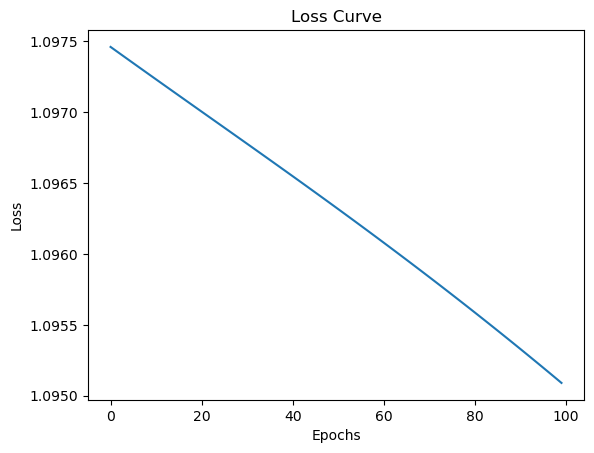

In [118]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
